# Using the same code as before, please solve the following exercises

    2. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Find the piece of code that chooses the optimization algorithm. Change the learning_rate argument to 0.0001.

Here are some takeaways:
1. It takes the algorithm the same time to finish working.
2. The loss is not minimized.
3. The weights and biases are far from what we want them to be (although that cannot be seen, as we didn't print them).
4. More iterations are needed for this learning rate to solve the problem.
5. The problem IS NOT SOLVED.
6. The final graph looks like a 45-degree line, but look at the axes -> it is not.

### Import the relevant libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\ipykernel\parentpoller.py:114: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org"""
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-

### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [11]:

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [12]:

input_size = 2
output_size = 1

### Outlining the model

In [13]:

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [16]:

mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

optimize = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(mean_loss)

### Prepare for execution

In [17]:

sess = tf.compat.v1.InteractiveSession()

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


### Initializing variables

In [18]:

initializer = tf.compat.v1.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [19]:

training_data = np.load('TF_intro.npz')

### Learning

In [20]:

for i in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

220.84009
219.49103
218.15068
216.81903
215.496
214.1815
212.8755
211.57794
210.28876
209.00793
207.7354
206.47105
205.2149
203.96687
202.72693
201.49496
200.271
199.0549
197.84671
196.64629
195.45366
194.26872
193.09146
191.92178
190.75966
189.6051
188.45796
187.31827
186.18591
185.06091
183.94313
182.8326
181.72923
180.633
179.54387
178.46176
177.38666
176.3185
175.25722
174.20284
173.15524
172.11443
171.08032
170.05293
169.03215
168.018
167.01038
166.00925
165.01462
164.02641
163.04459
162.06909
161.0999
160.13698
159.18031
158.22978
157.2854
156.34712
155.4149
154.48871
153.5685
152.65425
151.74586
150.8434
149.9467
149.05586
148.17073
147.29135
146.41762
145.54955
144.68707
143.83018
142.97882
142.13297
141.29254
140.45758
139.628
138.80376
137.98486
137.17125
136.3629
135.55977
134.7618
133.969
133.1813
132.39871
131.62119
130.84868
130.08113
129.31856
128.5609
127.80813
127.060234
126.317154
125.57887
124.84536
124.11656
123.39251
122.67311
121.95837


### Plotting the data

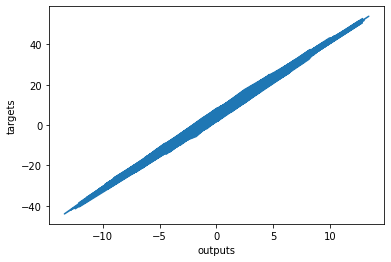

In [21]:

out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
        